# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# # Impor the OpenWeatherMap API key
from api_keys import weather_api_key

#  Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | twin falls
Processing Record 2 of Set 1 | takoradi
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | lorengau
Processing Record 5 of Set 1 | college
Processing Record 6 of Set 1 | nova vicosa
Processing Record 7 of Set 1 | egilsstadir
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | gokarna
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | mahina
Processing Record 13 of Set 1 | tvoroyri
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | hammerfest
Processing Record 18 of Set 1 | bamboo flat
Processing Record 19 of Set 1 | kone
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | bengkulu
Processing Record 22 of Set 1 | dolores hidalgo cuna

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          599
Lat           599
Lng           599
Max Temp      599
Humidity      599
Cloudiness    599
Wind Speed    599
Country       599
Date          599
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,twin falls,42.3505,-114.6445,49.89,76,0,10.36,US,1706662114
1,takoradi,4.8845,-1.7554,79.45,83,14,6.78,GH,1706662115
2,papatowai,-46.5619,169.4708,65.62,58,100,7.31,NZ,1706662115
3,lorengau,-2.0226,147.2712,83.39,81,100,10.85,PG,1706662115
4,college,64.8569,-147.8028,-14.85,64,75,0.00,US,1706662115


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,twin falls,42.3505,-114.6445,49.89,76,0,10.36,US,1706662114
1,takoradi,4.8845,-1.7554,79.45,83,14,6.78,GH,1706662115
2,papatowai,-46.5619,169.4708,65.62,58,100,7.31,NZ,1706662115
3,lorengau,-2.0226,147.2712,83.39,81,100,10.85,PG,1706662115
4,college,64.8569,-147.8028,-14.85,64,75,0.00,US,1706662115


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

The r-squared is: 0.554


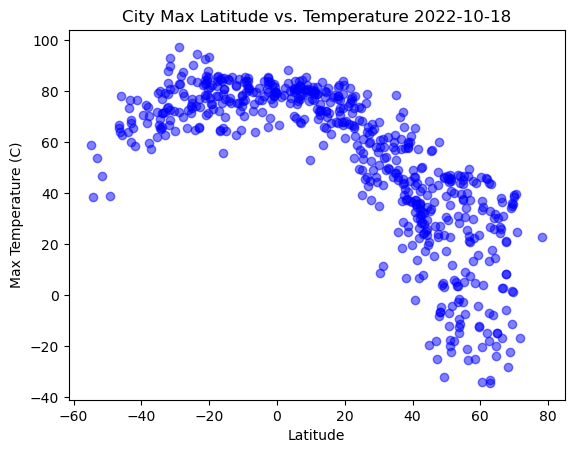

In [37]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, max_temp)
regress_values = lat * slope + intercept
plt.scatter(lat, max_temp, marker="o", color="blue", alpha = 0.5)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature 2022-10-18")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
print(f"The r-squared is: {round(rvalue**2,3)}")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

The r-squared is: 0.03


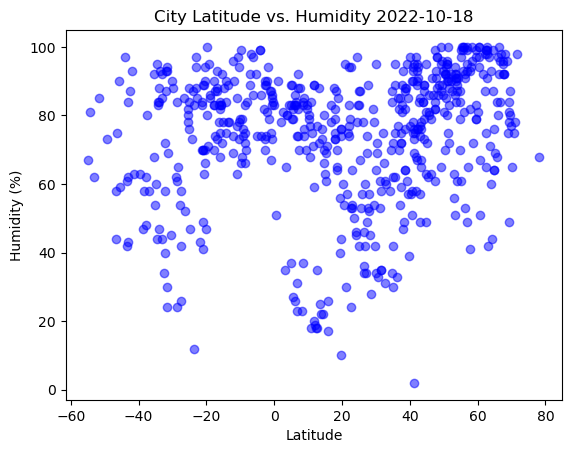

In [38]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, humidity)
regress_values = lat * slope + intercept
plt.scatter(lat, humidity, marker="o", color="blue", alpha = 0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity 2022-10-18")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {round(rvalue**2,3)}")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

The r-squared is: 0.018


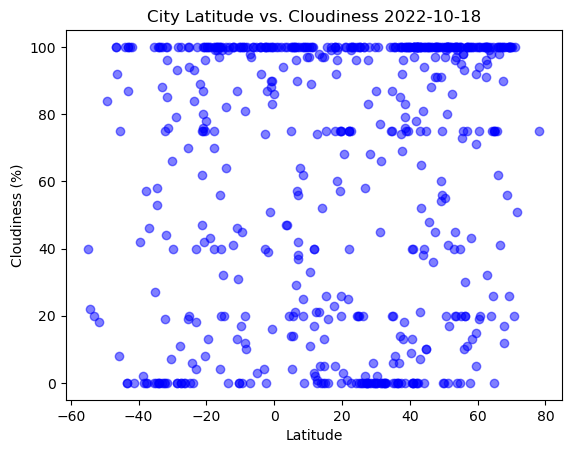

In [39]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(lat, cloudiness)
regress_values = lat * slope + intercept
plt.scatter(lat, cloudiness, marker="o", color="blue", alpha = 0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness 2022-10-18")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {round(rvalue**2,3)}")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

The r-squared is: 0.002


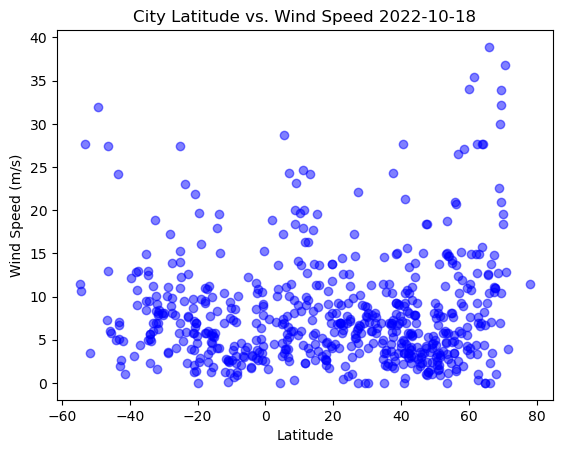

In [40]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df["Wind Speed"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(lat, wind_speed)
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(lat, wind_speed, marker="o", color="blue", alpha = 0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed 2022-10-18")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"The r-squared is: {round(rvalue**2,3)}")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,twin falls,42.3505,-114.6445,49.89,76,0,10.36,US,1706662114
1,takoradi,4.8845,-1.7554,79.45,83,14,6.78,GH,1706662115
4,college,64.8569,-147.8028,-14.85,64,75,0.00,US,1706662115
6,egilsstadir,65.2653,-14.3948,30.11,69,75,9.22,IS,1706662115
8,bethel,41.3712,-73.4140,34.65,76,100,6.91,US,1706662013


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,papatowai,-46.5619,169.4708,65.62,58,100,7.31,NZ,1706662115
3,lorengau,-2.0226,147.2712,83.39,81,100,10.85,PG,1706662115
5,nova vicosa,-17.8919,-39.3719,77.86,90,100,10.98,BR,1706662115
7,edinburgh of the seven seas,-37.0676,-12.3116,57.15,58,46,4.38,SH,1706662116
10,waitangi,-43.9535,-176.5597,63.82,97,100,5.01,NZ,1706662116


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.631


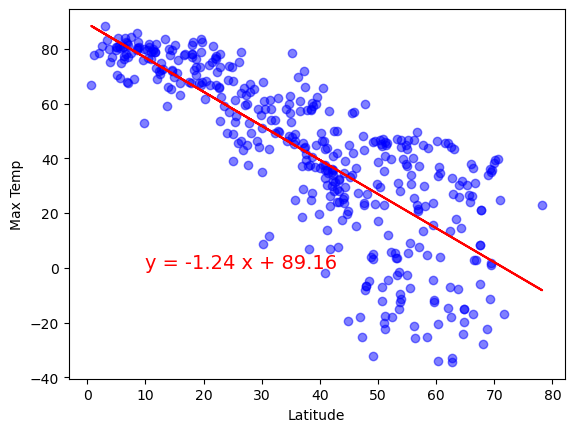

In [41]:
# Linear regression on Northern Hemisphere
northern_lat = northern_hemi_df["Lat"]
northern_max_temp = northern_hemi_df["Max Temp"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(northern_lat, northern_max_temp)
regress_values = northern_lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(northern_lat, northern_max_temp, marker="o", color="blue", alpha = 0.5)
plt.plot(northern_lat, regress_values, color='red')
plt.annotate(line_eq,(10,0), fontsize=14, color='red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {round(rvalue**2,3)}")

# Show plot
plt.show()

The r-squared is: 0.223


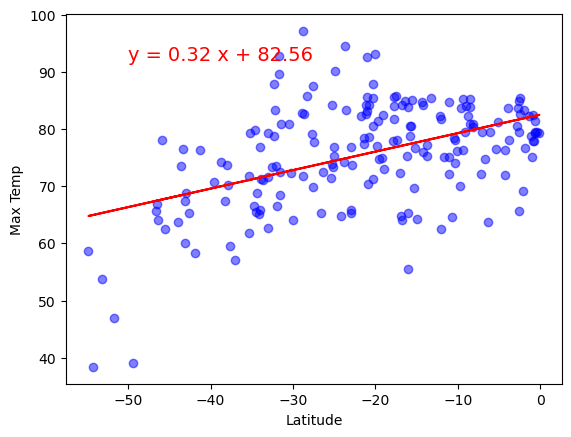

In [42]:
# Linear regression on Southern Hemisphere
southern_lat = southern_hemi_df["Lat"]
southern_max_temp = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_max_temp)
regress_values = southern_lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(southern_lat, southern_max_temp, marker="o", color="blue", alpha = 0.5)
plt.plot(southern_lat, regress_values, color='red')
plt.annotate(line_eq,(-50,92), fontsize=14, color='red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {round(rvalue**2,3)}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.145


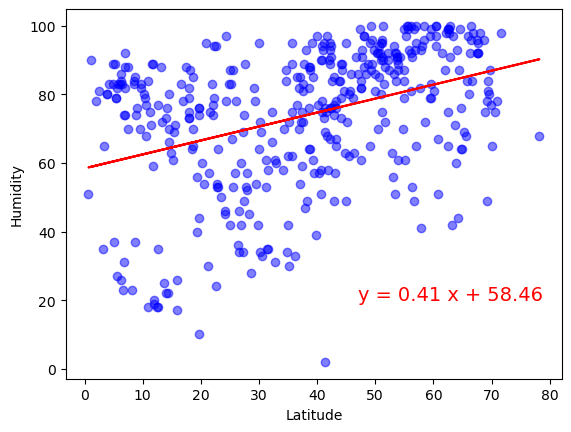

In [43]:
# Northern Hemisphere
northern_lat = northern_hemi_df["Lat"]
northern_humidity = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_humidity)
regress_values = northern_lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(northern_lat, northern_humidity, marker="o", color="blue", alpha = 0.5)
plt.plot(northern_lat, regress_values, color='red')
plt.annotate(line_eq,(47,20), fontsize=14, color='red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {round(rvalue**2,3)}")

# Show plot
plt.show()

The r-squared is: 0.115


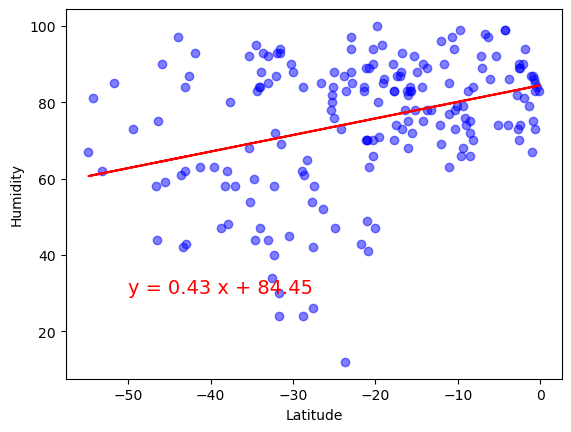

In [44]:
# Southern Hemisphere
southern_lat = southern_hemi_df["Lat"]
southern_humidity = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_humidity)
regress_values = southern_lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(southern_lat, southern_humidity, marker="o", color="blue", alpha = 0.5)
plt.plot(southern_lat, regress_values, color='red')
plt.annotate(line_eq,(-50,30), fontsize=14, color='red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {round(rvalue**2,3)}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.033


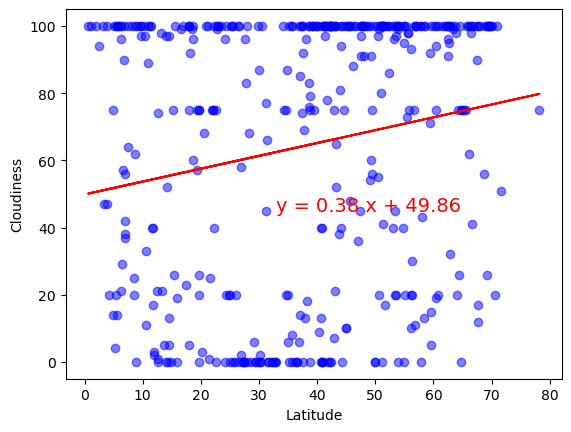

In [45]:
# Northern Hemisphere
northern_lat = northern_hemi_df["Lat"]
northern_cloudiness = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_cloudiness)
regress_values = northern_lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(northern_lat, northern_cloudiness, marker="o", color="blue", alpha = 0.5)
plt.plot(northern_lat, regress_values, color='red')
plt.annotate(line_eq,(33,45), fontsize=14, color='red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {round(rvalue**2,3)}")

# Show plot
plt.show()

The r-squared is: 0.05


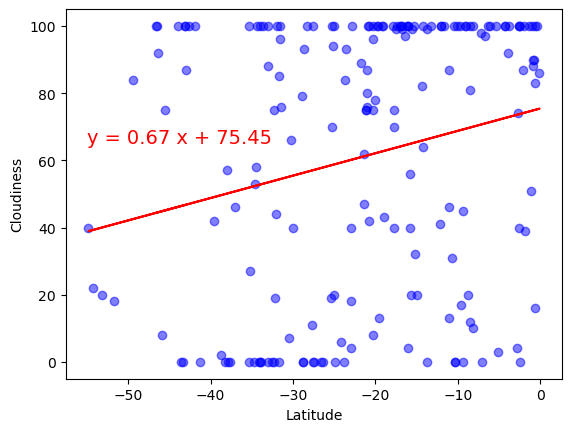

In [46]:
# Southern Hemisphere
southern_lat = southern_hemi_df["Lat"]
southern_cloudiness = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_cloudiness)
regress_values = southern_lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(southern_lat, southern_cloudiness, marker="o", color="blue", alpha = 0.5)
plt.plot(southern_lat, regress_values, color='red')
plt.annotate(line_eq,(-55,65), fontsize=14, color='red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {round(rvalue**2,3)}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.01


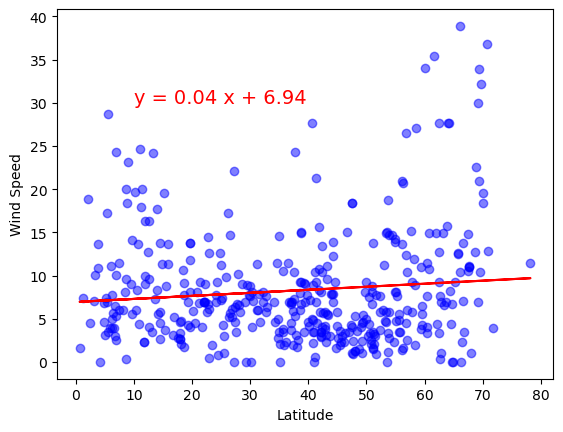

In [47]:
# Northern Hemisphere
northern_lat = northern_hemi_df["Lat"]
northern_wind_speed = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_wind_speed)
regress_values = northern_lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(northern_lat, northern_wind_speed, marker="o", color="blue", alpha = 0.5)
plt.plot(northern_lat, regress_values, color='red')
plt.annotate(line_eq,(10,30), fontsize=14, color='red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {round(rvalue**2,3)}")

# Show plot
plt.show()

The r-squared is: 0.097


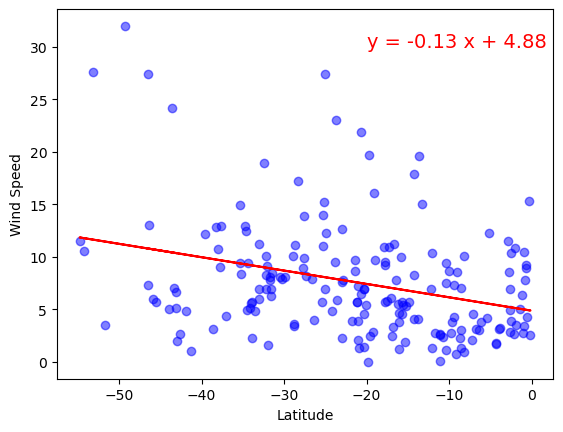

In [48]:
# Southern Hemisphere
southern_lat = southern_hemi_df["Lat"]
southern_wind_speed = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_wind_speed)
regress_values = southern_lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(southern_lat, southern_wind_speed, marker="o", color="blue", alpha = 0.5)
plt.plot(southern_lat, regress_values, color='red')
plt.annotate(line_eq,(-20,30), fontsize=14, color='red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {round(rvalue**2,3)}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#humitidy vs latitude in the northern hemisphere and southern have no correlation. The data is spread to far apart. 